In [108]:
import pandas as pd
import numpy as np
import re
import plotly.plotly as py
import plotly.figure_factory as ff
from plotly.graph_objs import *
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt
init_notebook_mode(connected=True)

In [109]:
kbp = pd.read_csv("killedbypolice.csv")
mpv = pd.read_csv("MPVDatasetDownload.csv")
wsp = pd.read_csv("https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/fatal-police-shootings-data.csv")

In [110]:
mpv = mpv[["Victim's name", "Victim's age", "Victim's race", "Victim's gender", "Date of Incident (month/day/year)", "City", "State", "Cause of death", "Body Camera (Source: WaPo)"]]
mpv = mpv[mpv["Victim's age"] != "Unknown"]
mpv["Victim's age"] = [entry if type(entry)==float else entry[0:2] for entry in mpv["Victim's age"]]
mpv["Victim's age"] = pd.to_numeric(mpv["Victim's age"])

# Creating a bar chart of months

In [111]:
# creating a column for month and year in Washington Post data
dateswsp = list(wsp["date"])
monthwsp = [date[date.find("-")+1:date.find("-")+3] for date in dateswsp]
yearwsp = [int(date[0:date.find("-")]) for date in dateswsp]
months = {"01": "January",
         "02": "February",
         "03": "March",
         "04": "April",
         "05": "May",
         "06": "June",
         "07": "July",
         "08": "August",
         "09": "September",
         "10": "October",
         "11": "November",
         "12": "December"}
monthwsp = [month.replace(month, months[month]) for month in monthwsp]
wsp["month"] = np.array(monthwsp)
wsp["year"] = np.array(yearwsp)

In [112]:
groupings = wsp.groupby(["year", "month"]).count()
months2015 = groupings.loc[2015]["id"]
months2016 = groupings.loc[2016]["id"]
months2017 = groupings.loc[2017]["id"]
months2018 = groupings.loc[2018]["id"]

In [113]:
months2015

month
April         84
August        94
December      89
February      77
January       76
July         104
June          65
March         92
May           71
November      77
October       84
September     82
Name: id, dtype: int64

In [114]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
kill2015 = []
kill2016 = []
kill2017 = []
kill2018 = []
for month in months:
    kill2015.append(months2015.loc[month])
    kill2016.append(months2016.loc[month])
    kill2017.append(months2017.loc[month])
    try:
        kill2018.append(months2018.loc[month])
    except:
        continue
kill2018+=[0]*(12 - len(kill2018))

In [115]:
trace_2015 = Bar(x=months,
                y=kill2015,
                name='2015',
                marker=dict(color='#ffcdd2'))

trace_2016 = Bar(x=months,
                y=kill2016,
                name='2016',
                marker=dict(color='#A2D5F2'))

trace_2017 = Bar(x=months,
                y=kill2017,
                name='2017',
                marker=dict(color='#59606D'))
trace_2018 = Bar(x=months,
                y=kill2018,
                name='2018',
                marker=dict(color='#111111'))

data = [trace_2015, trace_2016, trace_2017, trace_2018]
layout = Layout(title="Fatal Police Shootings per Month",
                xaxis=dict(title='Month'),
                yaxis=dict(title='Deaths'))
fig = Figure(data=data, layout=layout)

In [116]:
iplot(fig)

## Gender Breakdown by Month

first, need the months in order (not alphabetical)

In [117]:
monthnum = []
months = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}
for month in wsp.month:
    monthnum.append(months[month])
wsp["monthnum"] = monthnum

then, filter out the 2018 dates

In [118]:
wsp = wsp.loc[wsp["year"]!=2018]

In [119]:
gendermonth = wsp.groupby(["gender", "monthnum"]).count()["id"]
femalemonth = gendermonth[gendermonth.index.get_level_values("gender") == "F"]
malemonth = gendermonth[gendermonth.index.get_level_values("gender") == "M"]
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

In [120]:
trace_male = Bar(x=months,
                 y=list(malemonth),
                name='Male')
trace_female = Bar(x=months,
                 y=list(femalemonth),
                name='Female')
data = [trace_male, trace_female]
layout = Layout(title="People of Each Gender Killed Per Month",
                xaxis=dict(title='Month'),
                yaxis=dict(title='Deaths'),
               barmode='stack')
fig = Figure(data=data, layout=layout)
iplot(fig)

## Armed Breakdown by Age

In [121]:
newarmed = []
for arm in wsp.armed:
    if arm == 'unarmed':
        arm = 'unarmed'
    else:
        arm = 'armed'
    newarmed.append(arm)
wsp.armed = newarmed

In [122]:
agecat = []
for age in wsp.age:
    if age<=18:
        agecat.append("Under 18")
    elif age>18 and age<=38:
        agecat.append("Gen Y")
    elif age>38 and age<=53:
        agecat.append("Gen X")
    else:
        agecat.append("Baby Boomer")
wsp["age_categorical"] = agecat

In [123]:
wsp.groupby(["armed", "age_categorical"]).count()["id"]

armed    age_categorical
armed    Baby Boomer         397
         Gen X               713
         Gen Y              1519
         Under 18            103
unarmed  Baby Boomer          15
         Gen X                33
         Gen Y               149
         Under 18             16
Name: id, dtype: int64

In [124]:
labels = ["Baby Boomer", "Gen X", "Gen Y", "Under 18"]
values = [472, 800, 1677, 111]
trace = Pie(labels=labels, values=values)
iplot([trace])

In [125]:
labels = ["Baby Boomer", "Gen X", "Gen Y", "Under 18"]
values = [17, 38, 158, 16]
trace = Pie(labels=labels, values=values)
iplot([trace])

In [126]:
wsp.groupby(["armed", "age_categorical"]).count()["id"]

armed    age_categorical
armed    Baby Boomer         397
         Gen X               713
         Gen Y              1519
         Under 18            103
unarmed  Baby Boomer          15
         Gen X                33
         Gen Y               149
         Under 18             16
Name: id, dtype: int64

In [127]:
labels = ["armed", "unarmed"]

In [128]:
fig = {
    'data': [
        {
            'labels': labels,
            'values': [472, 18],
            'type': 'pie',
            'name': 'Baby Boomer',
            'marker': {'colors': ['#2f4f4f', '#d3d3d3']},
            'domain': {'x': [0, .48], 'y': [0, .49]},
            'hoverinfo':'label+percent+name',
            'textinfo':'none'
        },
        {
            'labels': labels,
            'values': [801, 38],
            'marker': {'colors': ['#2f4f4f', '#d3d3d3']},
            'type': 'pie',
            'name': 'Gen X',
            'domain': {'x': [.52, 1], 'y': [0, .49]},
            'hoverinfo':'label+percent+name',
            'textinfo':'none'

        },
        {
            'labels': labels,
            'values': [1679, 158],
            'marker': {'colors': ['#2f4f4f', '#d3d3d3']},
            'type': 'pie',
            'name': 'Gen Y',
            'domain': {'x': [0, .48], 'y': [.51, 1]},
            'hoverinfo':'label+percent+name',
            'textinfo':'none'
        },
        {
            'labels': labels,
            'values': [111, 16],
            'marker': {'colors': ['#2f4f4f', '#d3d3d3']},
            'type': 'pie',
            'name':'Under 18',
            'domain': {'x': [.52, 1], 'y': [.51, 1]},
            'hoverinfo':'label+percent+name',
            'textinfo': 'none'
        }
    ],
    'layout': {'title': 'Percentage of Armed and Unarmed People per Age Group',
            "annotations": [{
                "font": {"size": 16},
                "showarrow": False,
                "text": "Gen Y",
                "x": 0.07,
                "y": 1.0
            },
            {
                "font": {"size": 16},
                "text": "Under 18",
                "showarrow": False,
                "x": 0.6,
                "y": 1.0
            },
            {
                "font": {"size": 16},
                "text": "Baby Boomer",
                "showarrow": False,
                "x": -0.03,
                "y": 0.4
            },
            {
                "font": {"size": 16},
                "text": "Gen X",
                "showarrow": False,
                "x": 0.6,
                "y": 0.4
            }]
    }
}

iplot(fig)

# Creating a bar chart of ages

In [129]:
under18 = mpv.loc[mpv["Victim's age"] <= 18]
geny = mpv.loc[(mpv["Victim's age"] > 18) & (mpv["Victim's age"] <= 38)]
genx = mpv.loc[(mpv["Victim's age"] > 38) & (mpv["Victim's age"] <= 53)]
babyboomers = mpv.loc[mpv["Victim's age"] > 53]

under18counts = under18.groupby("Victim's race").count()["Victim's name"]
under18counts.drop("Unknown race")
otherunder18 = under18counts.loc["Asian"]+under18counts.loc["Pacific Islander"]+under18counts.loc["Native American"]

genycounts = geny.groupby("Victim's race").count()["Victim's name"]
genycounts.drop("Unknown race")
othergeny = genycounts.loc["Asian"]+genycounts.loc["Pacific Islander"]+genycounts.loc["Native American"]

genxcounts = genx.groupby("Victim's race").count()["Victim's name"]
genxcounts.drop("Unknown race")
othergenx = genxcounts.loc["Asian"]+genxcounts.loc["Pacific Islander"]+genxcounts.loc["Native American"]

boomercounts = babyboomers.groupby("Victim's race").count()["Victim's name"]
boomercounts.drop("Unknown race")
otherboomers = boomercounts.loc["Asian"]+boomercounts.loc["Pacific Islander"]+boomercounts.loc["Native American"]

races = ["Black", "White", "Hispanic", "Other"]
agesunder18 = [under18counts.loc["Black"], under18counts.loc["White"], under18counts.loc["Hispanic"], otherunder18]
genxers = [genxcounts.loc["Black"], genxcounts.loc["White"], genxcounts.loc["Hispanic"], othergenx]
genyers = [genycounts.loc["Black"], genycounts.loc["White"], genycounts.loc["Hispanic"], othergeny]
boomers = [boomercounts.loc["Black"], boomercounts.loc["White"], boomercounts.loc["Hispanic"], otherboomers]

In [130]:
trace_under18 = Bar(
    x=races,
    y=agesunder18,
    name='Under 18'
)
trace_geny = Bar(
    x=races,
    y=genyers,
    name='Gen Y (18-38)'
)
trace_genx = Bar(
    x=races,
    y=genxers,
    name='Gen X (39-53)'
)
trace_genboomer = Bar(
    x=races,
    y=boomers,
    name='Baby Boomers (54 and up)'
)

data = [trace_under18, trace_geny, trace_genx, trace_genboomer]
layout = Layout(
    barmode='stack'
)

fig = Figure(data=data, layout=layout)
iplot(fig)

# Creating a Waffle Chart of ages

In [131]:
from pywaffle import Waffle

In [132]:
allages = mpv.groupby("Victim's race").count()["Victim's name"]
allages.drop("Unknown race")
otherall = allages.loc["Asian"]+allages.loc["Pacific Islander"]+allages.loc["Native American"]
allagesy = [allages.loc["Black"], allages.loc["White"], allages.loc["Hispanic"], otherall]

In [133]:
data = pd.DataFrame(
    {
        'labels': ['Under 18', 'Gen Y', 'Gen X', 'Baby Boomers'],
        'Black': [int(agesunder18[0]/allagesy[0]*100), int(genyers[0]/allagesy[0]*100), int(genxers[0]/allagesy[0]*100), int(boomers[0]/allagesy[0]*100)],
        'White': [int(agesunder18[1]/allagesy[1]*100), int(genyers[1]/allagesy[1]*100), int(genxers[1]/allagesy[1]*100), int(boomers[1]/allagesy[0]*100)],
        'Hispanic': [int(agesunder18[2]/allagesy[2]*100), int(genyers[2]/allagesy[2]*100), int(genxers[2]/allagesy[2]*100), int(boomers[2]/allagesy[2]*100)],
        'Other': [int(agesunder18[3]/allagesy[3]*100), int(genyers[3]/allagesy[3]*100), int(genxers[3]/allagesy[3]*100), int(boomers[3]/allagesy[3]*100)]
    },
).set_index('labels')

/Users/AG/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



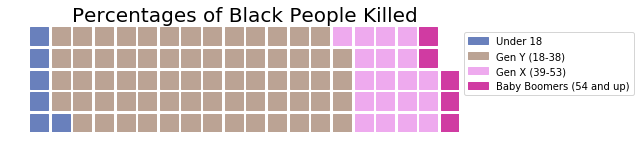

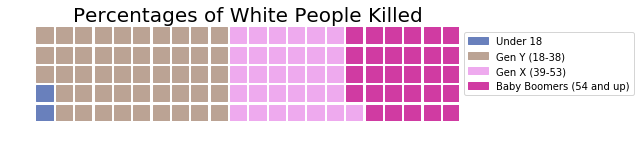

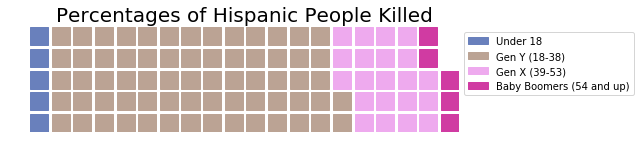

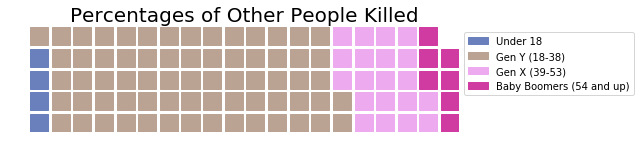

In [134]:
for race in races:
    fig = plt.figure(
        FigureClass=Waffle,
        rows=5,
        colors=("#6980bc", "#bba394", "#eeaaee", "#d03ba2"),
        figsize=(9,5),
        values={"Under 18": int(data[race].loc["Under 18"]), "Gen Y (18-38)": int(data[race].loc["Gen Y"]), "Gen X (39-53)": int(data[race].loc["Gen X"]), "Baby Boomers (54 and up)": int(data[race].loc["Baby Boomers"])},
        legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
        title={'label': 'Percentages of {0} People Killed'.format(race), 'loc': 'center', 'size':20},
    )

# Color Map of Killings by State

In [135]:
mpv["year"] = np.array([ str("20"+date.split("/")[2]) for date in mpv["Date of Incident (month/day/year)"]])

In [136]:
mpvpast = mpv.loc[mpv["year"]!="2018"]
mpvstate = mpvpast.groupby(["year","State"]).count()["Victim's name"]

# make lists of data by year
mpv2013 = mpvstate[mpvstate.index.get_level_values("year")=="2013"]
mpv2014 = mpvstate[mpvstate.index.get_level_values("year")=="2014"]
mpv2015 = mpvstate[mpvstate.index.get_level_values("year")=="2015"]
mpv2016 = mpvstate[mpvstate.index.get_level_values("year")=="2016"]
mpv2017 = mpvstate[mpvstate.index.get_level_values("year")=="2017"]
yeardata = [list(mpv2013), list(mpv2014), list(mpv2015), list(mpv2016), list(mpv2017)]
#add in 0 for Rhode Island in 2015
#yeardata[2].insert(41, 0)

# make list of states for each year
#statecode=list(mpvstate[mpvstate.index.get_level_values("year")=="2017"].index.get_level_values("State"))
states2013 = mpv2013.index.get_level_values("State")
states2014 = mpv2014.index.get_level_values("State")
states2015 = mpv2015.index.get_level_values("State")
states2016 = mpv2016.index.get_level_values("State")
states2017 = mpv2017.index.get_level_values("State")
statecode = [list(states2013), list(states2014), list(states2015), list(states2016), list(states2017)]

In [137]:
scl = [[0.0, '#ffe5e5'],[0.1, '#ffb2b2'], [0.2, '#ff7f7f'],[0.3, '#ff4c4c'],
       [0.4, '#ff0000'], [0.5, '#b20000'], [0.7, '#7f0000'], [1.0, '#4c0000']
      ]

data = [{
        'type':'choropleth',
        'colorscale': scl,
        'autocolorscale': False,
        'locations': statecode[0],
        'z': yeardata[0],
        'locationmode': 'USA-states',
        'marker': dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        'colorbar': {
            'title': "Deaths"
        }
}]

layout = dict(
        title = 'US Police Killings',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'
        )
)

layout['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 1500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]
layout['sliders'] = [{
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year: ',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}]
years=["2013", "2014", "2015", "2016", "2017"]
for year in years:
    # creating and appending each slider step
    slider_step = {'args': [
        [year],
        {'frame': {'duration': 1500, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': year,
     'method': 'animate'}
    layout['sliders'][0]['steps'].append(slider_step)

frames = []
for i in range(len(years)):
    # creating and appending data to frame
    frame = {
        'data': [],
        'name': years[i]
    }
    data_dict = {
        'type':'choropleth',
        'colorscale': scl,
        'autocolorscale': False,
        'locations': statecode[i],
        'z': yeardata[i],
        'locationmode': 'USA-states',
        'marker': dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        'colorbar': dict(
            title = "Deaths") 
    }
    frame['data'].append(data_dict)
    frames.append(frame)

In [138]:
fig = {
    'data': data,
    'layout': layout,
    'frames': frames
}
iplot(fig)

# Color Map of Killings by State per Capita

In [139]:
statepop = pd.read_csv("us-population.csv", thousands=",")
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'District of Columbia': 'DC',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}
statepop["States"] = [us_state_abbrev[state.strip(".")] for state in statepop["States"]]
statepop.set_index("States", inplace=True)

In [140]:
statepop.apply(pd.to_numeric, errors='ignore')
statepop = statepop[["2013", "2014", "2015", "2016", "2017"]]

In [141]:
print(len(mpvstate[mpvstate.index.get_level_values("year")=="2015"]))
mpvstate[mpvstate.index.get_level_values("year")=="2015"]

50


year  State
2015  AK         5
      AL        21
      AR         6
      AZ        43
      CA       212
      CO        29
      CT         4
      DC         6
      DE         4
      FL        82
      GA        40
      HI         4
      IA         5
      ID         8
      IL        23
      IN        22
      KS        13
      KY        18
      LA        30
      MA        12
      MD        20
      ME         2
      MI        19
      MN        14
      MO        24
      MS        14
      MT         4
      NC        28
      ND         1
      NE        10
      NH         4
      NJ        24
      NM        20
      NV        20
      NY        28
      OH        39
      OK        39
      OR        18
      PA        24
      SC        21
      SD         3
      TN        24
      TX       112
      UT        11
      VA        22
      VT         1
      WA        20
      WI        11
      WV        11
      WY         6
Name: Victim's name, dtype: int64

In [142]:
mpvstate[mpvstate.index.get_level_values("year")=="2016"]

year  State
2016  AK         7
      AL        27
      AR        23
      AZ        49
      CA       162
      CO        32
      CT         6
      DC         5
      DE         1
      FL        77
      GA        28
      HI         7
      IA         5
      ID         6
      IL        33
      IN        19
      KS        11
      KY        23
      LA        25
      MA        14
      MD        19
      ME         2
      MI        17
      MN        14
      MO        23
      MS        10
      MT         5
      NC        39
      ND         1
      NE         8
      NH         2
      NJ        17
      NM        22
      NV        15
      NY        24
      OH        28
      OK        33
      OR        17
      PA        25
      RI         2
      SC        18
      SD         6
      TN        26
      TX        94
      UT         9
      VA        20
      VT         2
      WA        27
      WI        17
      WV        12
      WY         2
Name: Victim's name

In [143]:
population = [list(statepop["2013"]), list(statepop["2014"]), list(statepop["2015"]), list(statepop["2016"]), list(statepop["2017"])]

In [144]:
scl = [[0.0, '#ffe5e5'],[0.1, '#ffb2b2'], [0.2, '#ff7f7f'],[0.3, '#ff4c4c'],
       [0.4, '#ff0000'], [0.5, '#b20000'], [0.7, '#7f0000'], [1.0, '#4c0000']
      ]

data = [{
        'type':'choropleth',
        'colorscale': scl,
        'autocolorscale': False,
        'locations': statecode[0],
        'z': yeardata[0],
        'locationmode': 'USA-states',
        'marker': dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        'colorbar': {
            'title': "Deaths per 1,000,000 People"
        }
}]

layout = dict(
        title = 'US Police Killings per Capita',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'
        )
)

layout['updatemenus'] = [{
    'buttons': [
        {
            'args': [None, {'frame': {'duration': 1500, 'redraw': False},
                     'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
            'label': 'Play',
            'method': 'animate'
        },
        {
            'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
            'transition': {'duration': 0}}],
            'label': 'Pause',
            'method': 'animate'
        }
    ],
    'direction': 'left',
    'pad': {'r': 10, 't': 87},
    'showactive': False,
    'type': 'buttons',
    'x': 0.1,
    'xanchor': 'right',
    'y': 0,
    'yanchor': 'top'
}]
layout['sliders'] = [{
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year: ',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}]
years=["2013", "2014", "2015", "2016", "2017"]
for year in years:
    # creating and appending each slider step
    slider_step = {'args': [
        [year],
        {'frame': {'duration': 1500, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': year,
     'method': 'animate'}
    layout['sliders'][0]['steps'].append(slider_step)

frames = []
for i in range(len(years)):
    # creating and appending data to frame
    frame = {
        'data': [],
        'name': years[i]
    }
    data_dict = {
        'type':'choropleth',
        'colorscale': scl,
        'autocolorscale': False,
        'locations': statecode[i],
        'z': [int(x/y*1000000) for x,y in zip(yeardata[i], population[i])],
        'locationmode': 'USA-states',
        'marker': dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        'colorbar': dict(
            title = "Deaths per 1,000,000 People") 
    }
    frame['data'].append(data_dict)
    frames.append(frame)

In [145]:
fig = {
    'data': data,
    'layout': layout,
    'frames': frames
}
iplot(fig)